Decision Tree

In [ ]:
# All the imports will go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
import math
import statsmodels.api as sm

In [ ]:
raw_health_care_df = pd.read_csv('/content/healthcare_dataset.csv')

# Columns we will use for the analysis
columns_to_use =['Age','Gender','Blood Type','Medical Condition','Date of Admission','Doctor','Hospital',
                 'Insurance Provider','Billing Amount','Room Number','Admission Type',
                 'Discharge Date','Medication','Test Results']
print(raw_health_care_df.columns)
health_care_df=raw_health_care_df[columns_to_use].copy()

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [ ]:
print(raw_health_care_df.shape)
health_care_df.head()

(10000, 15)


,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64


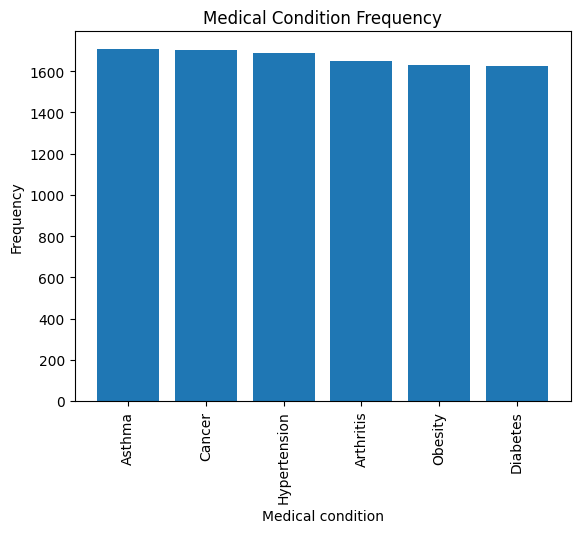

In [ ]:
frequency_table = health_care_df['Medical Condition'].value_counts()

print(frequency_table)

# Create a bar chart
plt.bar(frequency_table.index,frequency_table.values)
# Set the chart title and axes labels
plt.title("Medical Condition Frequency")
plt.xlabel("Medical condition")
plt.ylabel("Frequency")

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the chart
plt.show()

Urgent       3391
Emergency    3367
Elective     3242
Name: Admission Type, dtype: int64


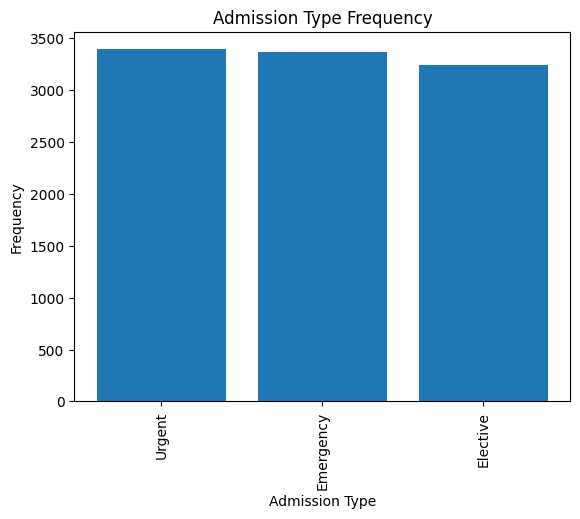

In [ ]:
frequency_table = health_care_df['Admission Type'].value_counts()

print(frequency_table)

#create a bar chart

plt.bar(frequency_table.index,frequency_table.values)

#set the chart title and axis labels
plt.title('Admission Type Frequency')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')

#Rotate X-axix labels by 90_degrees
plt.xticks(rotation=90)

#Display the Chart

plt.show()

Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
James Williams       5
James Perez          5
Michael Smith        5
David Johnson        4
Christopher Davis    4
Robert Miller        4
William Rodriguez    4
Christopher Jones    4
Michael Brown        4
Ashley Jackson       4
Jessica Johnson      3
Joshua Smith         3
James Sanchez        3
Jennifer Jones       3
Joseph Morales       3
Name: Doctor, dtype: int64


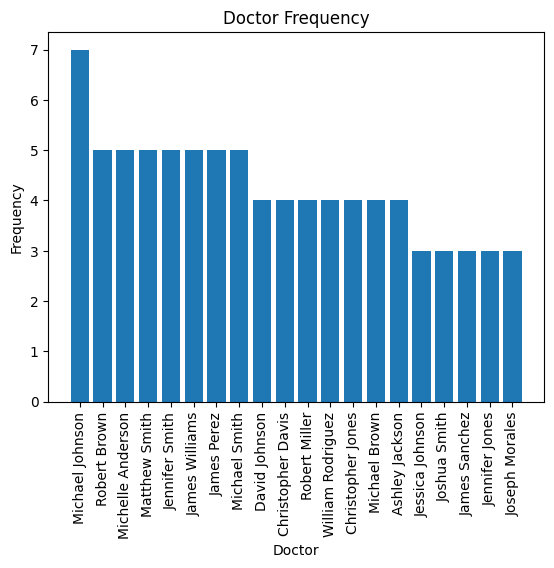

In [ ]:
frequency_table = health_care_df['Doctor'].value_counts()[:20]

print(frequency_table)

#create a bar chart

plt.bar(frequency_table.index,frequency_table.values)

#set the chart title and axis labels
plt.title('Doctor Frequency')
plt.xlabel('Doctor')
plt.ylabel('Frequency')

#Rotate X-axix labels by 90_degrees
plt.xticks(rotation=90)

#Display the Chart
plt.show()

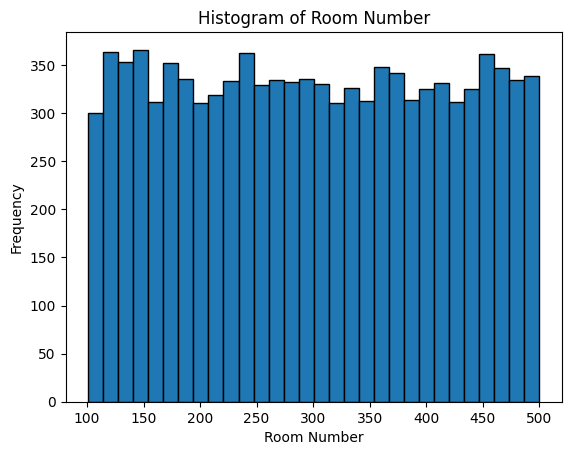

In [ ]:
# Create a histogram based on the Room Number column
plt.hist(health_care_df['Room Number'],bins=30, edgecolor='black')

#set the plot labels and titles
plt.xlabel('Room Number')
plt.ylabel('Frequency')
plt.title('Histogram of Room Number')

#Display The histogram
plt.show()

In [ ]:
health_care_df.corr(numeric_only=True)

,Age,Billing Amount,Room Number
Age,1.000000,-0.009483,-0.005371
Billing Amount,-0.009483,1.000000,-0.006160
Room Number,-0.005371,-0.006160,1.000000


In [ ]:
health_care_df.corr(method='pearson',numeric_only=True)

,Age,Billing Amount,Room Number
Age,1.000000,-0.009483,-0.005371
Billing Amount,-0.009483,1.000000,-0.006160
Room Number,-0.005371,-0.006160,1.000000


In [ ]:
health_care_df.corr(method='kendall',numeric_only=True)

,Age,Billing Amount,Room Number
Age,1.000000,-0.006310,-0.003629
Billing Amount,-0.006310,1.000000,-0.004218
Room Number,-0.003629,-0.004218,1.000000


In [ ]:
health_care_df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [ ]:
health_care_df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results'],
      dtype='object')

In [ ]:
health_care_df.isnull().sum()

Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [ ]:
print(health_care_df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [ ]:
health_care_df['Test Results'].unique()

array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)

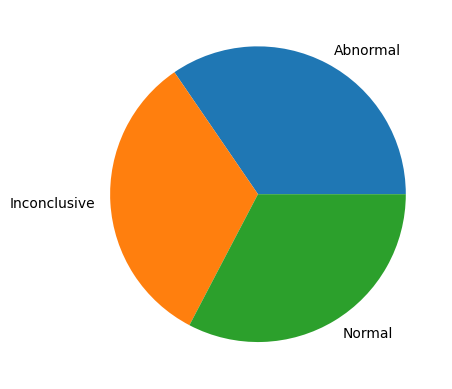

In [ ]:
#Creating a pie chart
a = np.array([3456, 3277, 3267])
mylabels = ['Abnormal', 'Inconclusive', 'Normal']

plt.pie(a, labels = mylabels)
plt.show()

In [ ]:
Abnormal_test_results = health_care_df['Test Results'] == 'Abnormal'
health_care_df[Abnormal_test_results]

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
3,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
5,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
8,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
10,45,Male,B-,Cancer,2021-04-13,Anthony Roberts,Little-Spencer,Aetna,40325.071394,306,Emergency,2021-05-11,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,74,Male,AB-,Obesity,2022-01-22,Thomas Huber,"Thompson, Flynn and Cooper",Medicare,1675.088639,374,Elective,2022-02-05,Aspirin,Abnormal
9986,18,Male,B+,Obesity,2022-03-30,Jennifer Williams,"Harris, Fox and Brown",Blue Cross,15872.814148,286,Emergency,2022-04-03,Ibuprofen,Abnormal
9989,47,Female,B+,Arthritis,2020-07-23,Jason Simmons,Alexander Inc,UnitedHealthcare,36044.467488,137,Elective,2020-08-15,Aspirin,Abnormal
9995,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal


In [ ]:
Normal_test_results = health_care_df['Test Results'] == 'Normal'
health_care_df[Normal_test_results]

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
4,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
7,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
9,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,37,Male,O+,Hypertension,2019-01-29,James May,"Sutton, Andrews and Johnson",UnitedHealthcare,8296.299322,308,Urgent,2019-02-04,Penicillin,Normal
9993,39,Male,O-,Hypertension,2023-10-09,Stephen Evans,Moran Ltd,Cigna,12379.134624,380,Urgent,2023-10-20,Lipitor,Normal
9996,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal


In [ ]:
Inconclusive_test_results = health_care_df['Test Results'] == 'Inconclusive'
health_care_df[Inconclusive_test_results]

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
11,23,Female,O-,Hypertension,2019-06-09,William Miller,Rose Inc,Medicare,6185.903530,126,Emergency,2019-06-26,Paracetamol,Inconclusive
12,85,Female,A+,Diabetes,2021-11-29,Laura Roberts,"Malone, Thompson and Mejia",Aetna,4835.945650,444,Elective,2021-12-14,Aspirin,Inconclusive
14,65,Female,AB+,Cancer,2021-06-05,Katherine Lowe,Castaneda-Hardy,Cigna,10342.836124,120,Emergency,2021-06-25,Ibuprofen,Inconclusive
15,32,Female,O+,Arthritis,2021-08-07,Curtis Smith,Burch-White,Aetna,27174.942906,492,Emergency,2021-08-14,Aspirin,Inconclusive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,63,Female,B-,Cancer,2022-01-30,Angela Baker,"Garcia, Smith and Huffman",Blue Cross,14416.634915,307,Urgent,2022-02-19,Penicillin,Inconclusive
9985,72,Male,AB+,Hypertension,2019-09-14,Martin Lopez,Osborne PLC,Cigna,27476.721751,351,Urgent,2019-09-26,Lipitor,Inconclusive
9987,84,Female,O-,Obesity,2022-04-18,Mario Gomez,Sullivan Inc,Cigna,27920.309416,128,Urgent,2022-05-09,Ibuprofen,Inconclusive
9990,35,Male,A+,Arthritis,2020-10-30,Paul Bell,"Freeman, Nguyen and Ferguson",Blue Cross,48753.129033,179,Urgent,2020-11-13,Lipitor,Inconclusive


In [ ]:
health_care_df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results'],
      dtype='object')

In [ ]:
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition',
       'Doctor', 'Hospital', 'Insurance Provider','Admission Type', 'Medication']
numerical_columns = ['Age', 'Billing Amount']
# Extract features (X) and target variable (y)
X = health_care_df[categorical_columns + numerical_columns]
y = health_care_df['Test Results']

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)
# Apply one-hot encoding to X
X = preprocessor.fit_transform(X)

In [ ]:
x_for_understanding = pd.DataFrame(X.toarray(), columns=preprocessor.get_feature_names_out())
display(x_for_understanding.head())
x_for_understanding.columns

,cat__Gender_Male,cat__Blood Type_A-,cat__Blood Type_AB+,cat__Blood Type_AB-,cat__Blood Type_B+,cat__Blood Type_B-,cat__Blood Type_O+,cat__Blood Type_O-,cat__Medical Condition_Asthma,cat__Medical Condition_Cancer,...,cat__Insurance Provider_Medicare,cat__Insurance Provider_UnitedHealthcare,cat__Admission Type_Emergency,cat__Admission Type_Urgent,cat__Medication_Ibuprofen,cat__Medication_Lipitor,cat__Medication_Paracetamol,cat__Medication_Penicillin,remainder__Age,remainder__Billing Amount
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,37490.983364
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,47304.064845
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,61.0,36874.896997
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,23303.322092
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,51.0,18086.344184


Index(['cat__Gender_Male', 'cat__Blood Type_A-', 'cat__Blood Type_AB+',
       'cat__Blood Type_AB-', 'cat__Blood Type_B+', 'cat__Blood Type_B-',
       'cat__Blood Type_O+', 'cat__Blood Type_O-',
       'cat__Medical Condition_Asthma', 'cat__Medical Condition_Cancer',
       ...
       'cat__Insurance Provider_Medicare',
       'cat__Insurance Provider_UnitedHealthcare',
       'cat__Admission Type_Emergency', 'cat__Admission Type_Urgent',
       'cat__Medication_Ibuprofen', 'cat__Medication_Lipitor',
       'cat__Medication_Paracetamol', 'cat__Medication_Penicillin',
       'remainder__Age', 'remainder__Billing Amount'],
      dtype='object', length=18078)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

In [ ]:
X_train

<7500x18078 sparse matrix of type '<class 'numpy.float64'>'
	with 63564 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

3698          Normal
4832        Abnormal
9178          Normal
6746        Abnormal
5774    Inconclusive
            ...     
456         Abnormal
6017          Normal
709         Abnormal
8366          Normal
1146          Normal
Name: Test Results, Length: 7500, dtype: object

In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
# Model performance on training set
y_pred_train =classifier.predict(X_train)

In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 34.52%


In [ ]:
acc = classifier.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 34.40%


In [ ]:
# Predicting the test results
y_pred=classifier.predict(X_test)
# Classification results on test set
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.34
Confusion Matrix: 
 [[860   1   2]
 [811   0   0]
 [825   1   0]]
              precision    recall  f1-score   support

    Abnormal       0.34      1.00      0.51       863
Inconclusive       0.00      0.00      0.00       811
      Normal       0.00      0.00      0.00       826

    accuracy                           0.34      2500
   macro avg       0.11      0.33      0.17      2500
weighted avg       0.12      0.34      0.18      2500



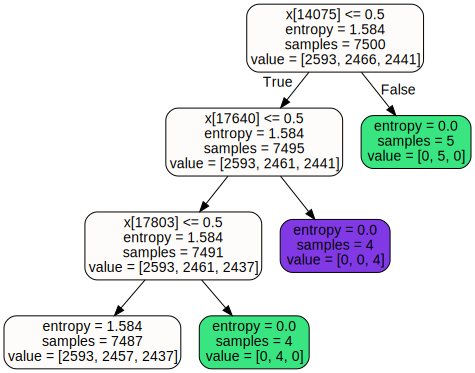

In [ ]:
import graphviz
from sklearn import tree
feature_names = ['Age','Gender', 'Medical condition', 'Doctor', 'Blood Type','Hospital','Insurance Provider']
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded = True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid
parameter_grid = {
    'max_depth': [2, 4, 5, 8, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
print(parameter_grid)

{'max_depth': [2, 4, 5, 8, 10, 15, 20, 25], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
# Membuat objek DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=dtc, cv=3, param_grid=parameter_grid)

# Menggunakan data latih yang sudah dinormalisasi
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 5, 8, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Lakukan prediksi pada data uji
predictions = grid_search.predict(X_test)

# Cetak classification report dengan mengatasi zero_division
print("Classification Report:")
print(classification_report(y_test, predictions, zero_division=1))  # Mengatur zero_division menjadi 1

# Cetak confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.34      0.92      0.50       863
Inconclusive       0.30      0.02      0.03       811
      Normal       0.29      0.04      0.08       826

    accuracy                           0.34      2500
   macro avg       0.31      0.33      0.20      2500
weighted avg       0.31      0.34      0.21      2500

Confusion Matrix:
[[792  15  56]
 [761  14  36]
 [772  17  37]]
